# Breast Cancer Analysis

In [ ]:
!pip install dataprep

     |████████████████████████████████| 9.5 MB 4.6 MB/s 
     |████████████████████████████████| 1.0 MB 36.9 MB/s 
     |████████████████████████████████| 95 kB 3.5 MB/s 
     |████████████████████████████████| 749 kB 49.1 MB/s 
     |████████████████████████████████| 1.5 MB 41.9 MB/s 
     |████████████████████████████████| 132 kB 51.3 MB/s 
     |████████████████████████████████| 943 kB 49.3 MB/s 
     |████████████████████████████████| 965 kB 60.8 MB/s 
     |████████████████████████████████| 50 kB 5.1 MB/s 
     |████████████████████████████████| 366 kB 43.0 MB/s 
     |████████████████████████████████| 78 kB 5.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 10.9 MB 32.7 MB/s 
     |████████████████████████████████| 1.1 MB 55.3 MB/s 
     |████████████████████████████████| 271 kB 45.9 MB/s 
     |████████████████████████████████| 94 kB 2.4 MB/s 
     |██████

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from dataprep.eda import create_report
from dataprep.eda import plot_missing
from dataprep.eda import plot_correlation
from dataprep.eda import plot

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'dataprep'

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from dataprep.eda import create_report
from dataprep.eda import plot_missing
from dataprep.eda import plot_correlation
from dataprep.eda import plot

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# Dataset Analysis

In [ ]:
data = pd.read_csv('BRCA.csv')
df = data.copy()
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1]) 
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [ ]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

Date_of_Last_Visit    5.089820
Patient_Status        3.892216
Patient_ID            0.000000
Age                   0.000000
Gender                0.000000
Protein1              0.000000
Protein2              0.000000
Protein3              0.000000
Protein4              0.000000
Tumour_Stage          0.000000
Histology             0.000000
ER status             0.000000
PR status             0.000000
HER2 status           0.000000
Surgery_type          0.000000
Date_of_Surgery       0.000000
dtype: float64

In [ ]:
plot_missing(df)

NameError: name 'plot_missing' is not defined

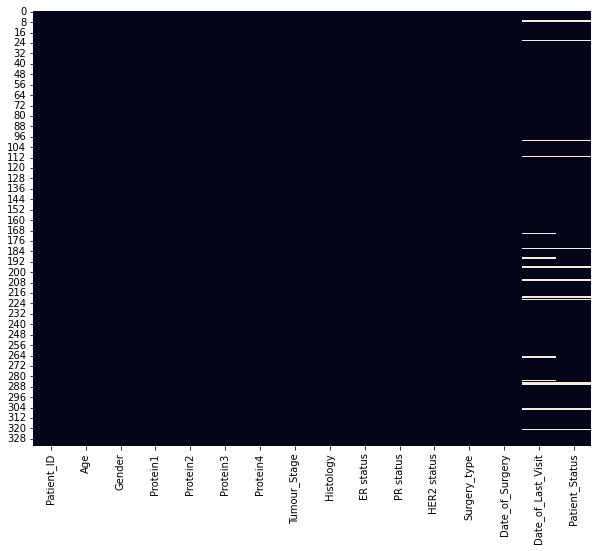

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna(),cbar=False)
plt.show()


In [ ]:
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')

There is 334 rows
There is 16 columns


# Checking for duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.loc[df.duplicated(keep=False),:]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status


In [ ]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(334, 16)

# Target Distribution

In [ ]:
df = data.copy()
df = df.drop(['Patient_ID','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
df['Patient_Status'].value_counts(normalize=True) #Classes déséquilibrées

Alive    0.794393
Dead     0.205607
Name: Patient_Status, dtype: float64

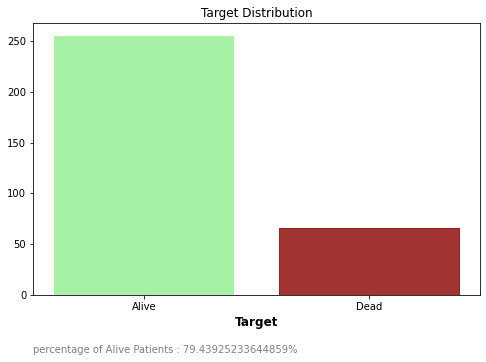

In [ ]:
target_dist = df['Patient_Status'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(8,5))

barplot = plt.bar(target_dist.index, target_dist, color = 'lightgreen', alpha = 0.8)
barplot[1].set_color('darkred')

ax.set_title('Target Distribution')
percentage = df['Patient_Status'].value_counts(normalize=True)[0]*100
ax.annotate("percentage of Alive Patients : {}%".format(percentage),
              xy=(0, 0),xycoords='axes fraction', 
              xytext=(0,-50), textcoords='offset points',
              va="top", ha="left", color='grey',
              bbox=dict(boxstyle='round', fc="w", ec='w'))

plt.xlabel('Target', fontsize = 12, weight = 'bold')
plt.show()

In [ ]:
# Class count
count_class_0, count_class_1 = df['Patient_Status'].value_counts()

# Divide by class
df_class_0 = df[df['Patient_Status'] == 'Alive']
df_class_1 = df[df['Patient_Status'] == 'Dead']

print(count_class_0)
print(count_class_1)

255
66


Random under-sampling:
Alive    66
Dead     66
Name: Patient_Status, dtype: int64


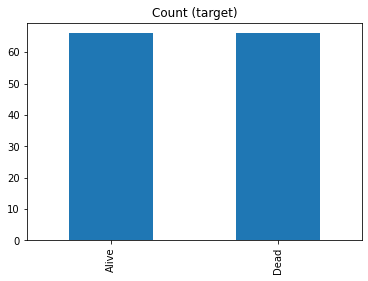

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1,random_state=42)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under['Patient_Status'].value_counts())

df_under['Patient_Status'].value_counts().plot(kind='bar', title='Count (target)');

# Categorical Features

In [ ]:
for col in df.select_dtypes("object"):
    print(f'{col :-<50} {df[col].unique()}')

Gender-------------------------------------------- ['FEMALE' 'MALE']
Tumour_Stage-------------------------------------- ['III' 'II' 'I']
Histology----------------------------------------- ['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma']
ER status----------------------------------------- ['Positive']
PR status----------------------------------------- ['Positive']
HER2 status--------------------------------------- ['Negative' 'Positive']
Surgery_type-------------------------------------- ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy']
Patient_Status------------------------------------ ['Alive' 'Dead' nan]


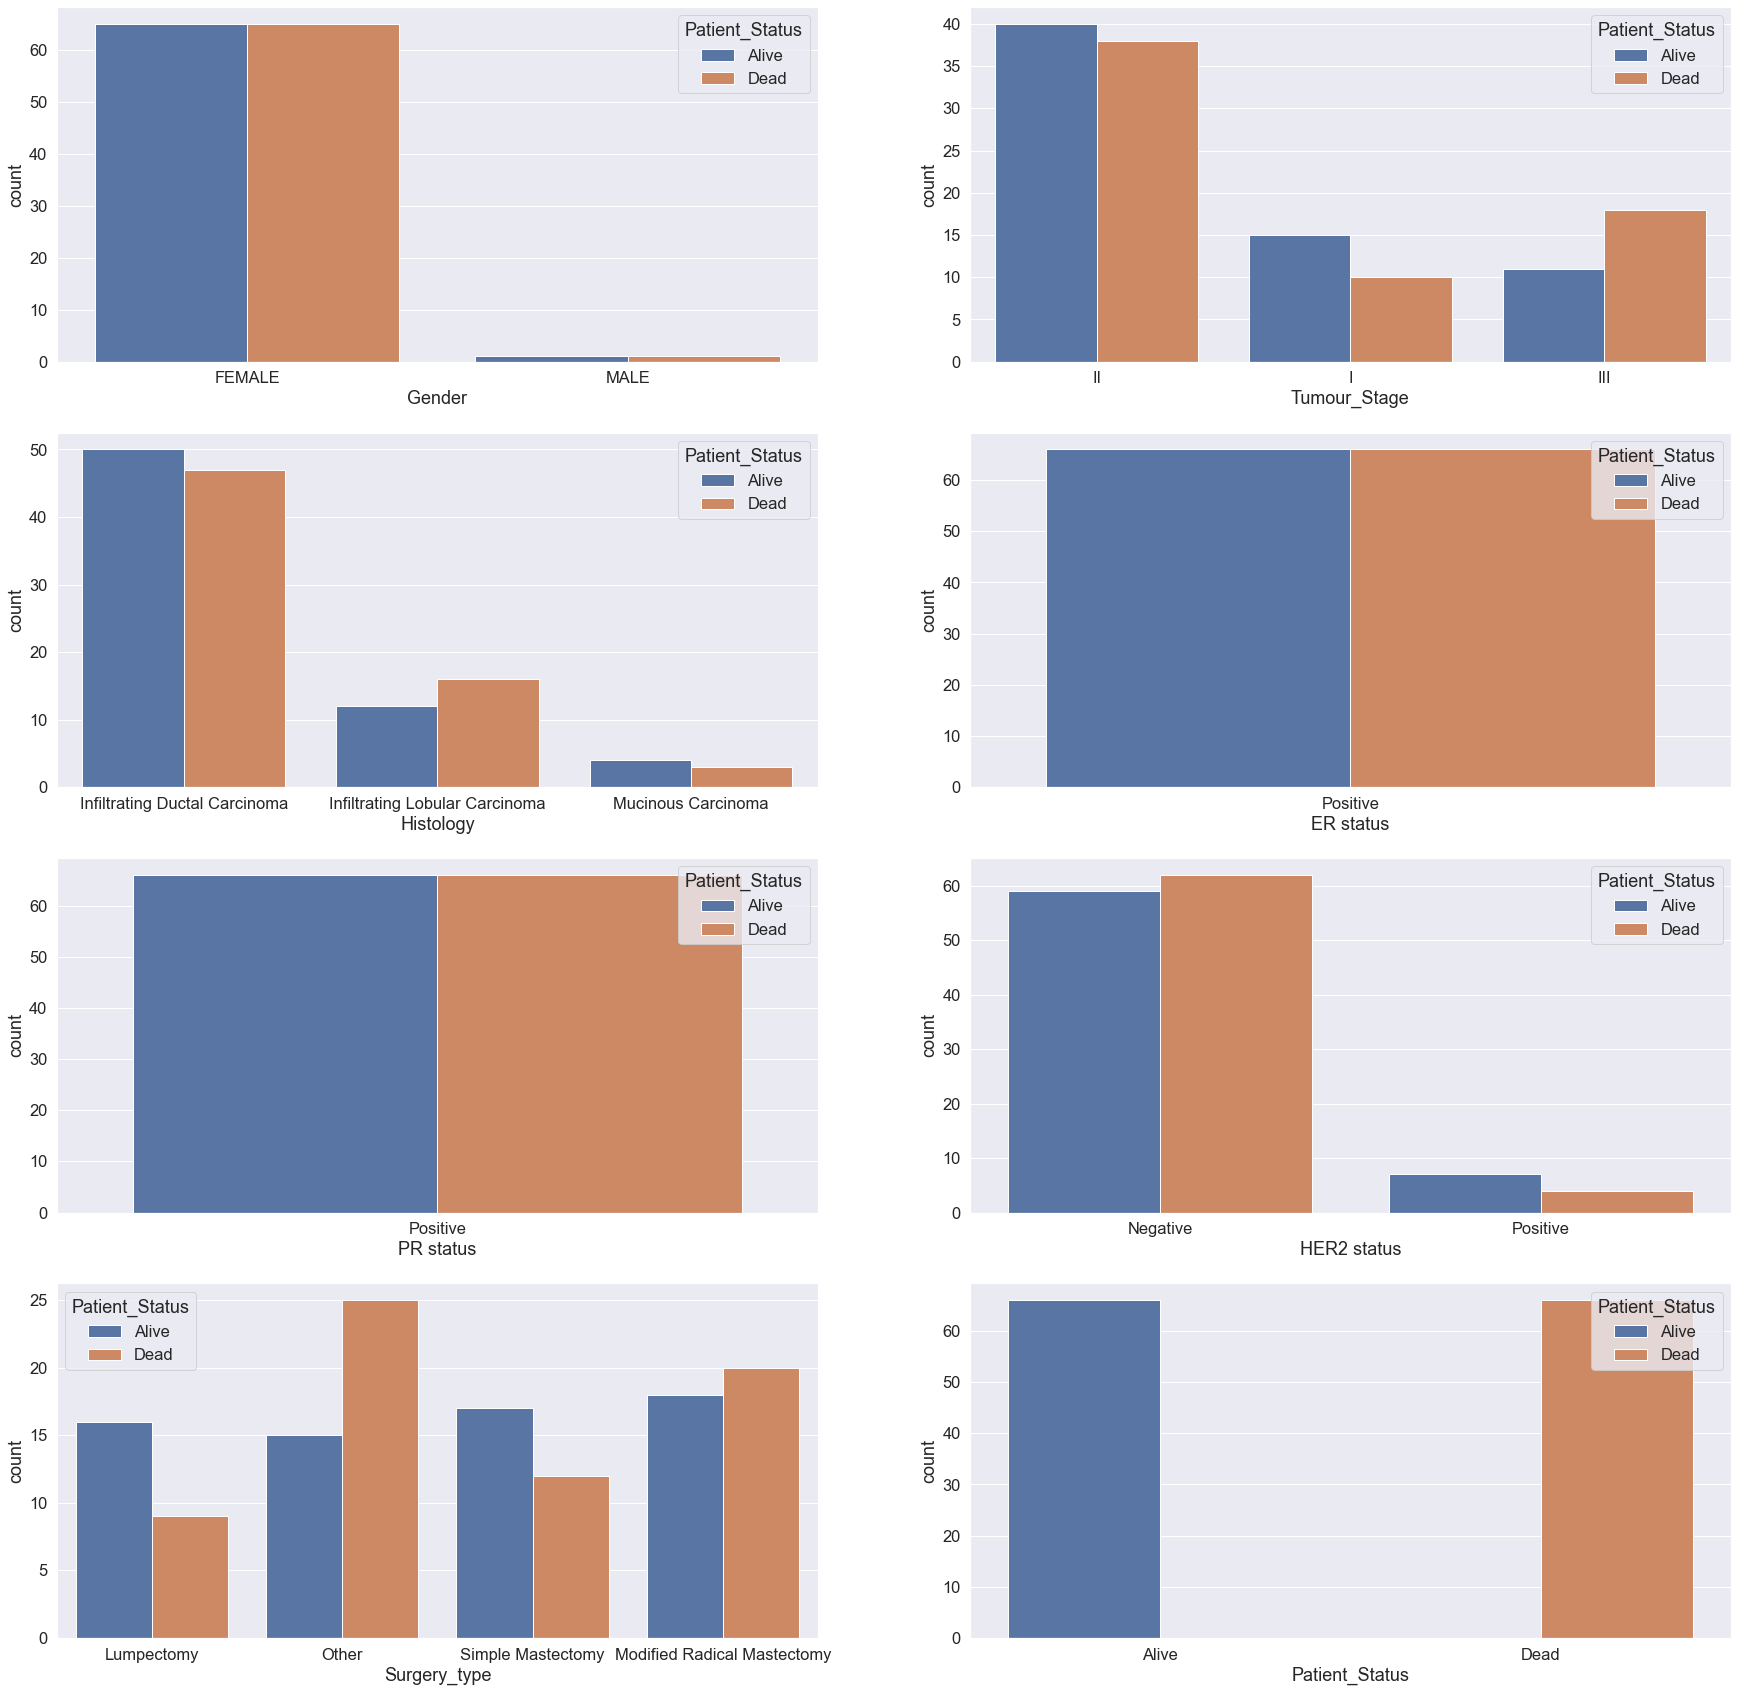

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(30, 30))
i=0
sns.set(font_scale = 1.5)
for col in df.select_dtypes('object'): 
    sns.countplot(df_under[col], hue=df_under['Patient_Status'], ax=ax[i//2][i%2])
    i=i+1
plt.show()

import warnings
warnings.filterwarnings('ignore')

# Continuous Features

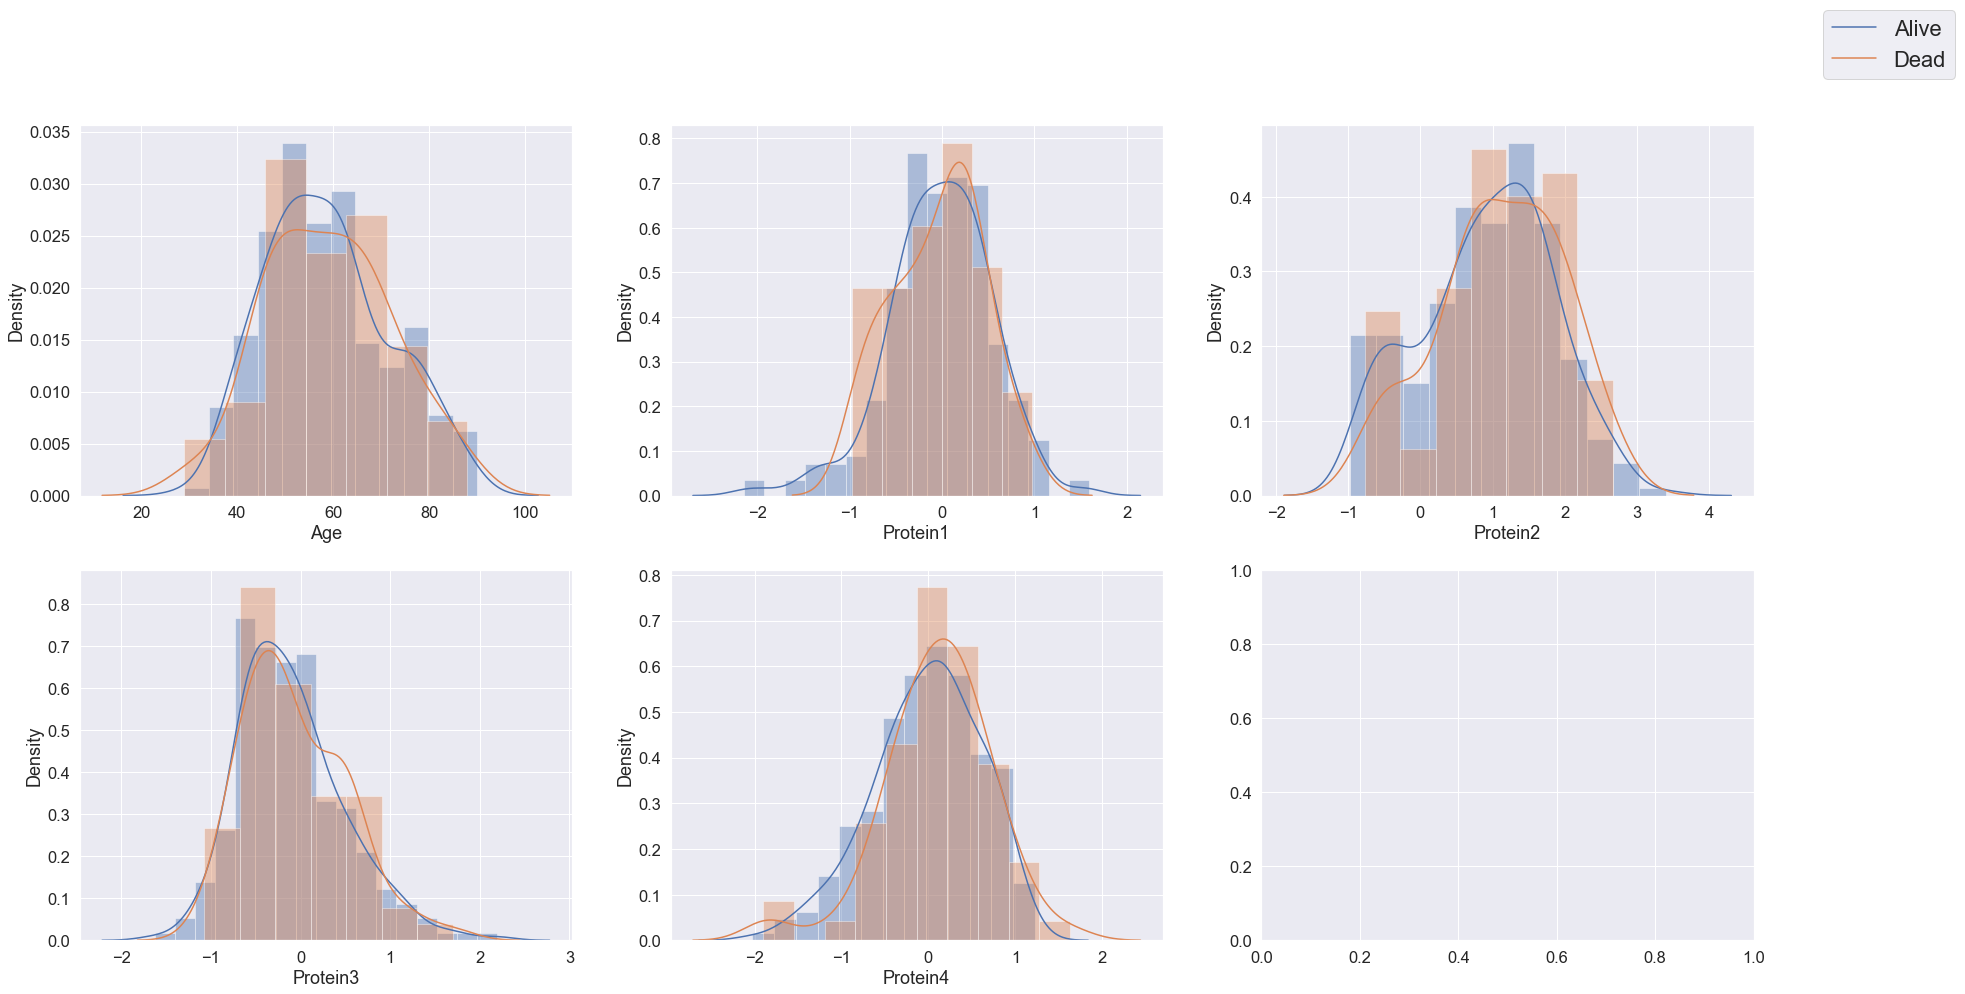

In [ ]:
Alive_df = df[df['Patient_Status']=="Alive"]
Dead_df = df[df['Patient_Status']=="Dead"]
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(2,3, figsize=(30, 15))
i=0
for col in df.select_dtypes(include=['float64','int64']):
    sns.distplot(Alive_df[col],label='Alive',ax=ax[i//3][i%3])
    sns.distplot(Dead_df[col],label='Dead',ax=ax[i//3][i%3])
    i=i+1
fig.legend(labels=['Alive','Dead'],fontsize='22')
fig.show()

# A bit od Data Engineering

In [ ]:
def encoding(df):                                          #We can now analyze categorical features as quantitative features
    code = {'FEMALE':0,    
            'MALE':1,
            'III':3,
            'II':2,
            'I':1,
            'Infiltrating Ductal Carcinoma':0,
            'Mucinous Carcinoma':1,
            'Infiltrating Lobular Carcinoma':2,
            'Negative':0,
            'Positive':1,
            'Modified Radical Mastectomy':0,
            'Lumpectomy':1,
            'Simple Mastectomy':2,
            'Other':3,
            'Alive':1,
            'Dead':0
           }
    for col in df.select_dtypes('object'):
        df.loc[:,col]=df[col].map(code)        
    return df

def imputation(df):
    df = df.fillna(df.median())
    df = df.dropna()
    return df

def feature_engineering(df):
    useless_columns = ['Patient_ID','Date_of_Surgery','Date_of_Last_Visit','ER status','PR status']
    df = df.drop(useless_columns,axis=1)
    return df

def preprocessing(df):
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('Patient_Status',axis=1)
    y = df['Patient_Status']    

    return df,X,y

In [ ]:
df = data.copy()
df,X,y=preprocessing(df)

Random under-sampling:
1.0    66
0.0    66
Name: Patient_Status, dtype: int64


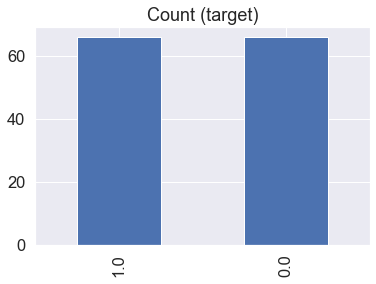

In [ ]:
# Class count
count_class_0, count_class_1 = df['Patient_Status'].value_counts()

# Divide by class
df_class_0 = df[df['Patient_Status'] == 1]
df_class_1 = df[df['Patient_Status'] == 0]

df_class_0_under = df_class_0.sample(count_class_1,random_state=42)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under['Patient_Status'].value_counts())

# Resampling
df_under['Patient_Status'].value_counts().plot(kind='bar', title='Count (target)');

<AxesSubplot:>

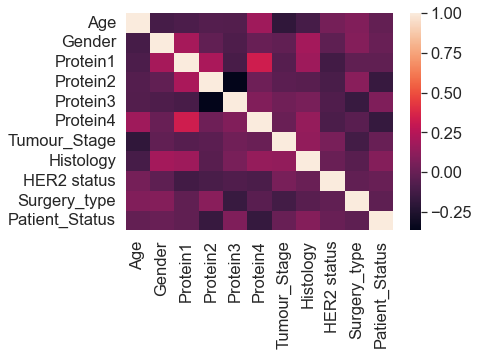

In [ ]:
sns.heatmap(df_under.corr())

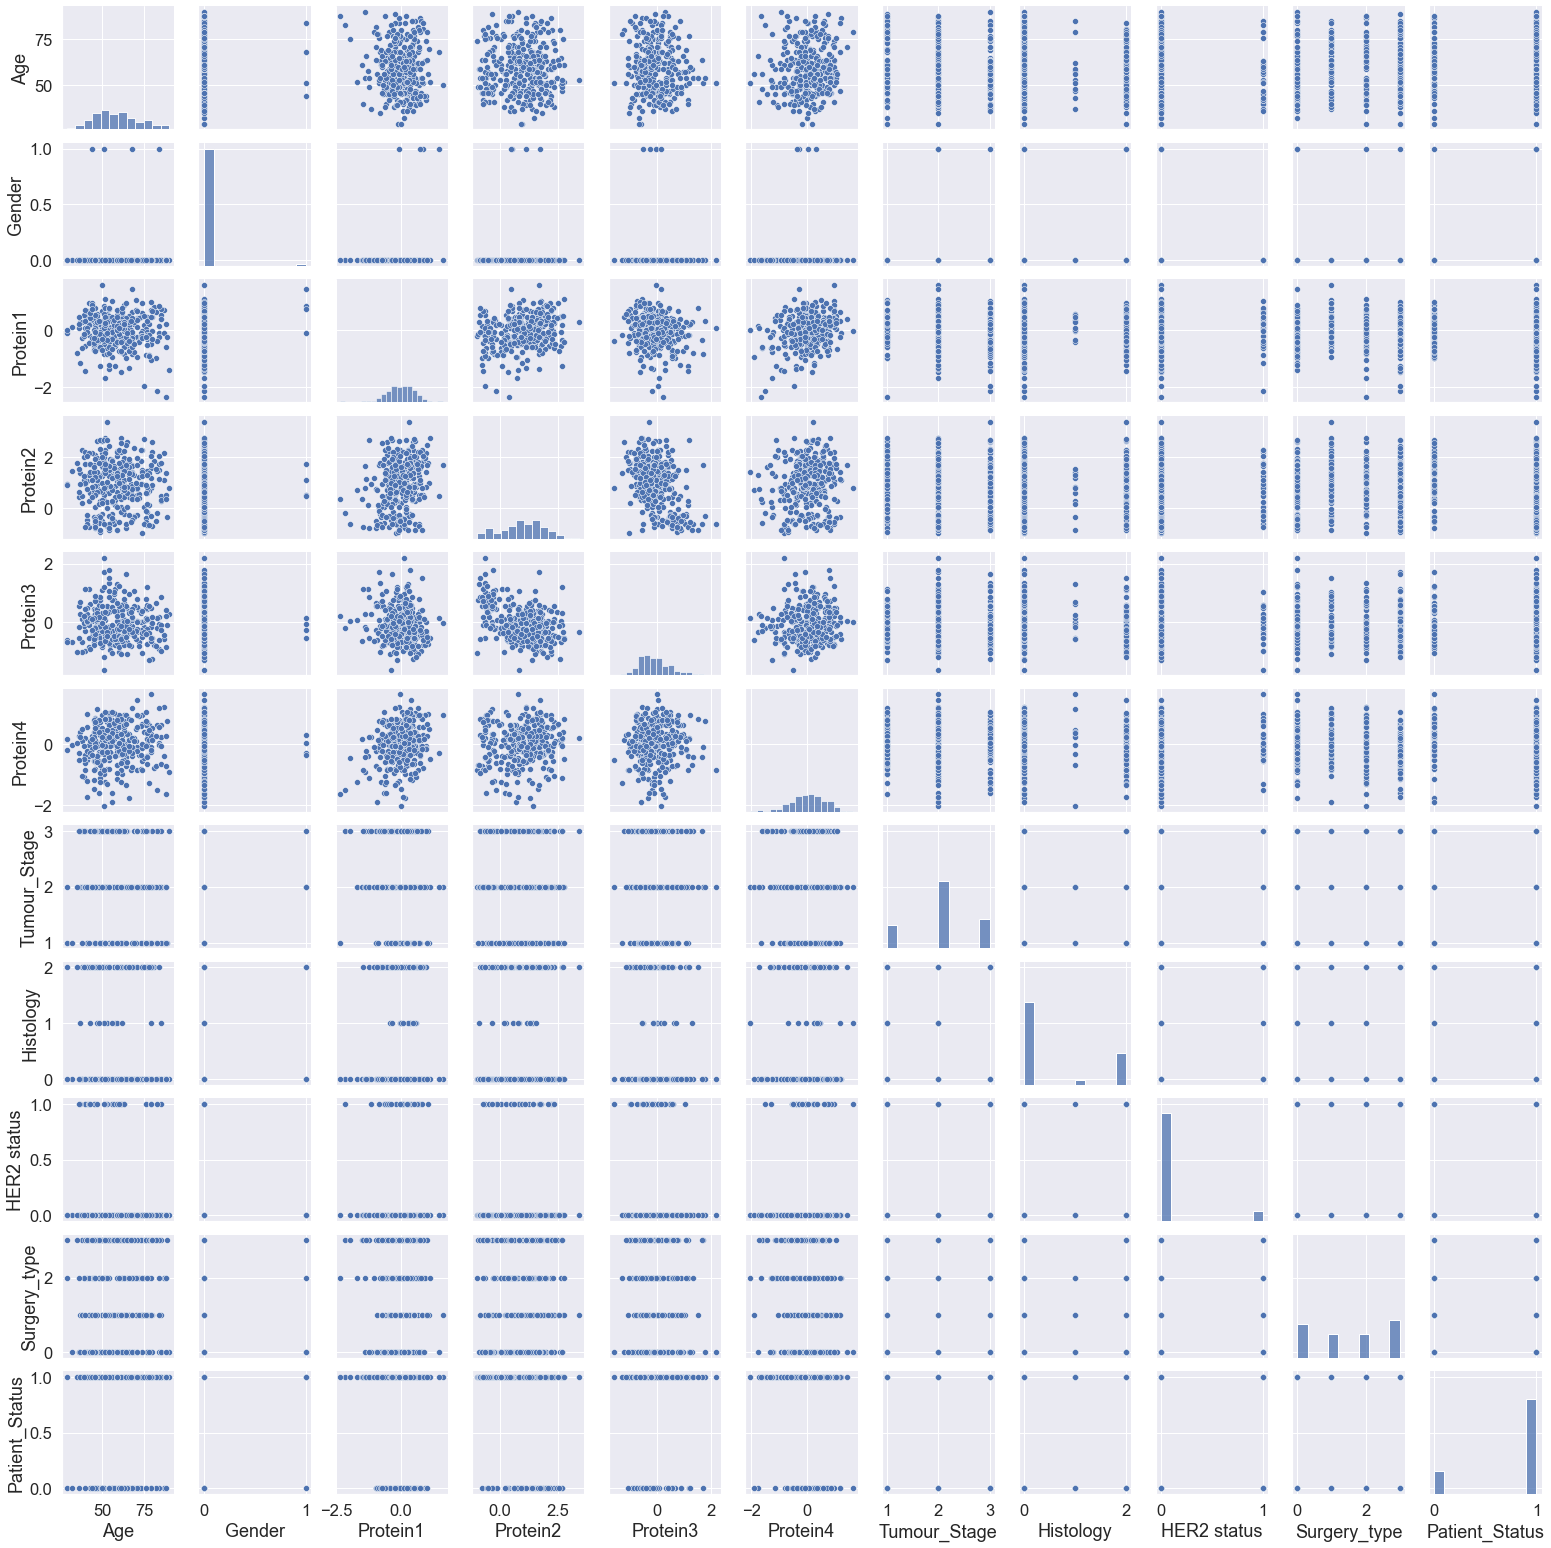

In [ ]:
sns.pairplot(df, height=2)

# Modelling

In [1]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
trainset, testset = train_test_split(df_under, test_size=0.2, random_state=0)
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(x = trainset['Patient_Status'] , data = trainset['Patient_Status'],ax=ax[0],palette="Set3").set_title('TrainSet')
sns.countplot(x = testset['Patient_Status'] , data = testset['Patient_Status'],ax=ax[1],palette="Set2").set_title('TestSet')

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

In [ ]:
X_train = trainset.drop(['Patient_Status'],axis=1)
y_train = trainset['Patient_Status']
X_test = testset.drop(['Patient_Status'],axis=1)
y_test = testset['Patient_Status']

In [ ]:
preprocessor = make_pipeline(RobustScaler())

PCAPipeline = make_pipeline(preprocessor, PCA(n_components=3,random_state=42))

RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(random_state=42))
AdaPipeline = make_pipeline(preprocessor,AdaBoostClassifier(random_state=42))
SVMPipeline = make_pipeline(preprocessor,SVC(random_state=42,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier())
LRPipeline = make_pipeline(preprocessor,LogisticRegression(solver='sag',random_state=42))

# PCA Analysis

In [ ]:
PCA_df = pd.DataFrame(PCAPipeline.fit_transform(X_train))
y_train = y_train.astype(int)
y_train.reset_index(drop=True, inplace=True)
PCA_df = pd.concat([PCA_df, y_train], axis=1, ignore_index=True )
PCA_df.head()

,0,1,2,3
0,-0.792496,-0.009582,-0.707232,1
1,-0.561121,1.524745,-0.453318,0
2,-0.072062,-1.668854,-0.343776,0
3,0.236570,0.675897,-0.401078,1
4,-0.275412,-0.856502,0.431383,0


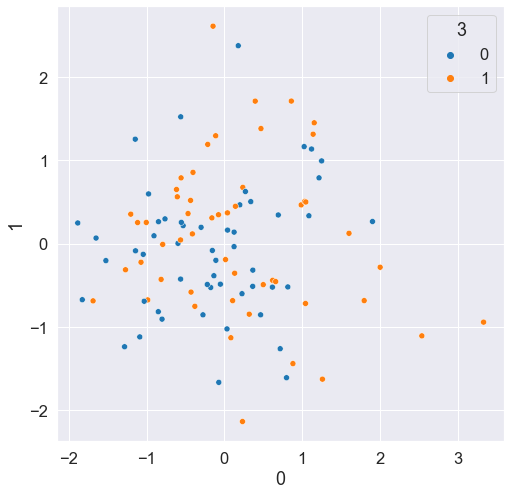

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(PCA_df[0],PCA_df[1],hue=PCA_df[3],palette=sns.color_palette("tab10", 2))
plt.show()

In [ ]:
import plotly.express as px
figure1 = px.scatter_3d(PCA_df,
        x=0, 
        y=1, 
        z=2, 
        color = 3,
                       width=600, height=800)
figure1.update_traces(marker=dict(size=5,
                              line=dict(width=0.2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

figure1.show()


ModuleNotFoundError: No module named 'plotly'

# Training models

In [ ]:
dict_of_models = {'RandomForest': RandomPipeline,
'AdaBoost': AdaPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'LR': LRPipeline}

In [ ]:
def evaluation(model):
    # calculating the probabilities
    y_pred_proba = model.predict_proba(X_test)

    # finding the predicted valued
    y_pred = np.argmax(y_pred_proba,axis=1)
    print('Accuracy = ', accuracy_score(y_test, y_pred))
    print('-')
    print(confusion_matrix(y_test,y_pred))
    print('-')
    print(classification_report(y_test,y_pred))
    print('-')
    
    N, train_score, test_score = learning_curve(model, X_train, y_train, 
                                               cv=4, scoring='f1', 
                                               train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(5,5))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, test_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()

---------------------------------
RandomForest
Accuracy =  0.48148148148148145
-
[[8 5]
 [9 5]]
-
              precision    recall  f1-score   support

         0.0       0.47      0.62      0.53        13
         1.0       0.50      0.36      0.42        14

    accuracy                           0.48        27
   macro avg       0.49      0.49      0.47        27
weighted avg       0.49      0.48      0.47        27

-


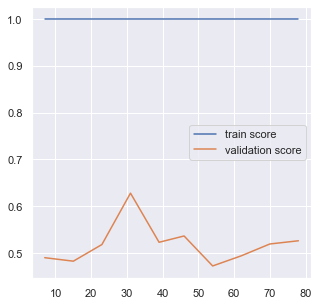

---------------------------------
AdaBoost
Accuracy =  0.48148148148148145
-
[[6 7]
 [7 7]]
-
              precision    recall  f1-score   support

         0.0       0.46      0.46      0.46        13
         1.0       0.50      0.50      0.50        14

    accuracy                           0.48        27
   macro avg       0.48      0.48      0.48        27
weighted avg       0.48      0.48      0.48        27

-


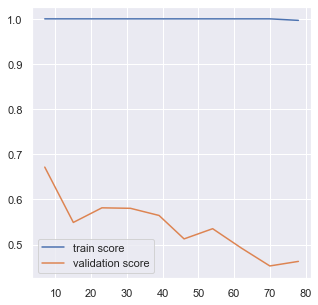

---------------------------------
SVM
Accuracy =  0.48148148148148145
-
[[10  3]
 [11  3]]
-
              precision    recall  f1-score   support

         0.0       0.48      0.77      0.59        13
         1.0       0.50      0.21      0.30        14

    accuracy                           0.48        27
   macro avg       0.49      0.49      0.44        27
weighted avg       0.49      0.48      0.44        27

-


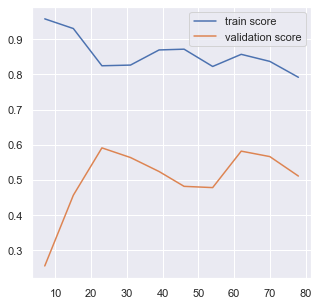

---------------------------------
KNN
Accuracy =  0.3333333333333333
-
[[4 9]
 [9 5]]
-
              precision    recall  f1-score   support

         0.0       0.31      0.31      0.31        13
         1.0       0.36      0.36      0.36        14

    accuracy                           0.33        27
   macro avg       0.33      0.33      0.33        27
weighted avg       0.33      0.33      0.33        27

-


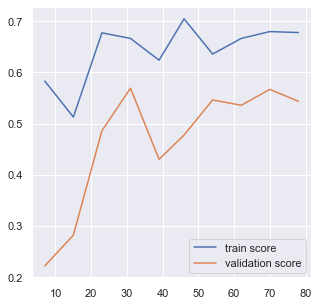

---------------------------------
LR
Accuracy =  0.4444444444444444
-
[[5 8]
 [7 7]]
-
              precision    recall  f1-score   support

         0.0       0.42      0.38      0.40        13
         1.0       0.47      0.50      0.48        14

    accuracy                           0.44        27
   macro avg       0.44      0.44      0.44        27
weighted avg       0.44      0.44      0.44        27

-


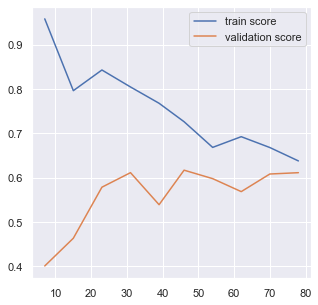

In [ ]:
sns.set(font_scale = 1)
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    model.fit(X_train,y_train)
    evaluation(model)

# Tuning threshold

In [ ]:
best_classifier = KNNPipeline

thresholds = [0.3,0.4,0.5,0.6,0.7,0.8]
best_t = 0.3
best_acc = 0
for t in thresholds:
    y_pred = (best_classifier.predict_proba(X_test)[:,1] >= t).astype(int)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_acc=acc
        best_t=t

In [ ]:
print('Accuracy on test set :',round(best_acc*100),"%")
print('Best threshold :',best_t)

Accuracy on test set : 44 %
Best threshold : 0.7


# Training Artificial Neural Network

In [ ]:
# Importing the Keras libraries and packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
X_train.shape

(105, 10)

In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
classifier.add(Dropout(0.2))
# Adding the second hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2))
# Adding the third hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.add(Dropout(0.2))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=80)
history =classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, callbacks=callback)

NameError: name 'Sequential' is not defined

# Conclusion

According to the results shown above, these models (RF, AdaBoost, KNN, SVM, XGBoost, LR, ANN) can't make the classification between Dead and Alive patients.
Best we can do is getting a 1/2 chance of guessing right...


# Hypothesis

The features have no impact on the target
There isn't enough rows in the dataset (need more people)
The dataset isn't representative of the population
As we undersampled the dataset, we only have 66*2 rows in the end. I could have tried to oversample instead
